# 2018-05-03 - MotionClouds avec CHAMP
Une module qui contient les fonctions pour générer les MotionClouds selon plusieurs difficultés est dérivé du notebook 2018-04-24_02. Par exemple :

In [ ]:
import CHAMP.MC as MotionClouds
from CHAMP.DataLoader import LoadData, LoadCloudsDB


#depuis le module
MotionClouds.generate_easy_MC(N_theta = 500, N_theta_test = 25)

#depuis DataLoader, avec Download le paramètre pour générer ou non
LoadData('Clouds', 'clouds_easy', download = True, clouds_diff = 'easy')

### Importer et process des MC


Size= torch.Size([1, 400, 1, 64, 64])


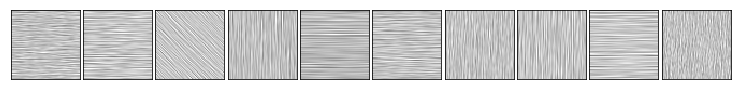

In [2]:
%matplotlib inline
import CHAMP.MC as MotionClouds
from CHAMP.DataLoader import LoadData, LoadCloudsDB
from CHAMP.DataTools import LocalContrastNormalization, FilterInputData
from CHAMP.Monitor import DisplayDico
import os

path = './clouds_easy'

TrSet, TeSet = LoadData(name = 'Clouds', data_path =path, decorrelate=False, resize=None, download = False,
                       clouds_diff = 'easy')
to_display = TrSet[0][0, 0:10, :, :, :] #displays 10 faces

print('Size=', TrSet[0].shape)
DisplayDico(to_display)

Avec les normalisations et les gaussiens :

Local normalization
Gaussian filtered


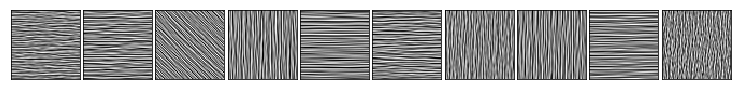

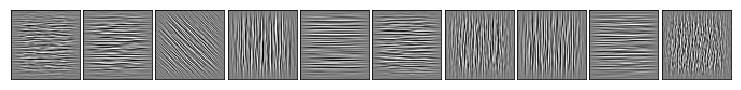

In [3]:
Normalized_TrSet, _, _, _ = LocalContrastNormalization(TrSet)
to_display = Normalized_TrSet[0][0, 0:10, :, :, :]
print("Local normalization")
DisplayDico(to_display)

Filtered_L_TrSet = FilterInputData(
    Normalized_TrSet, sigma=0.25, style='Custom', start_R=15)
to_display = Filtered_L_TrSet[0][0, 0:10, :, :, :]
print("Gaussian filtered")
DisplayDico(to_display)

### Convolution à un layer 
Apparament le deuxième ne marche pas ? On importe et on filtre :

In [ ]:
from CHAMP.CHAMP_Layer import CHAMP_Layer
from CHAMP.DataLoader import LoadData
from CHAMP.DataTools import LocalContrastNormalization, FilterInputData, GenerateMask
from CHAMP.Monitor import DisplayDico, DisplayConvergenceCHAMP, DisplayWhere

path = os.path.join(datapath, "DB_face")

TrSet, TeSet = LoadData('Face', path, decorrelate=False, resize=(65, 65))

N_TrSet, _, _, _ = LocalContrastNormalization(TrSet) #normalized
Filtered_L_TrSet = FilterInputData(
    N_TrSet, sigma=0.25, style='Custom', start_R=15) #gaussianed

to_display = Filtered_L_TrSet[0][0, 0:10, :, :, :]
DisplayDico(to_display)

On entraine le réseau (5 mn/200 epochs sur une 1080) :

In [ ]:
# MP Parameters
nb_dico = 20
width = 9
dico_size = (width, width)
l0 = 20
seed = 30
# Learning Parameters
eta = .05
nb_epoch = 500

L1 = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico,
                 dico_size=dico_size, verbose=2)
dico = L1.TrainLayer(Filtered_L_TrSet, eta=eta, nb_epoch=nb_epoch, seed=seed)